The Signal Class defines the base class for handling continuous signals, or in other words, the data values/ data set that you want to process. 

In [1]:
import numpy as np
import pandas as pd
np.random.seed(10)

from dreye import Domain, Signal, SignalContainer
from dreye.err import DreyeError
from dreye.constants import ureg

First initialize your signal class. Here we initialized a 2D array with 10 rows and 4 columns. Next, define your domain. Here, we created the domain range using the numpy arange method, and it ranges from 1-10 with a step size of 1.

We have also defined a few important parameters here. For example, **domain** can either be a domain instance that was previously created, or you can create one on the spot and define the units using **domain_units** like we did here. It is also important to define the **domain_axis**, which is the axis of the signal array for which you want to perform operations on. **units** needs to be defined as the units for the signal. Naming the signals using the **labels** parameter is also a useful to keep track of your data. You can also fine tune the interpolator function by passing specific arguments to it using **interpolator_kwargs**. Lastly, **attrs** is a user-defined dictionary that will keep track of any additional information needed to perform operations on the signal.


To get a more complete idea of all possible parameters, please see the full documentation at ________ .

In [2]:
index = pd.Index([('a', 'b'), ('a', 'c'), ('b', 'c'), ('d', 'e')], names=['values', 'c'])

In [3]:
signal = Signal(
    np.random.random((10, 4)), # 1 or 2D
    domain=np.arange(10),
    domain_units='s',
    domain_axis=0, 
    units='volts', 
    attrs={'f':'b'},
    labels=index, # index-like
    name='signal',
    interpolator_kwargs={'bounds_error':False, 'fill_value':0.5}
)
signal2 = signal.copy()
signal2.name = 'signal2'


In [4]:
signal.attrs['t'] = 'c'
print(signal.attrs)
print(signal2.attrs)

{'f': 'b', 't': 'c'}
{'f': 'b'}


Once the signal is created, it will have a myriad of attributes. The definitions of each of these can be found here. 

In [5]:
signal.to_longframe().head()

,domain,labels,values,name,units,units_dimensionality,domain_units,domain_units_dimensionality,domain_min,domain_max,signal_min,signal_max,values_label,c,f,t
0,1.000000e-10,"(a, b)",0.771321,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,a,b,b,c
1,1.000000e-10,"(a, c)",0.020752,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,a,c,b,c
2,1.000000e-10,"(b, c)",0.633648,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,b,c,b,c
3,1.000000e-10,"(d, e)",0.748804,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,d,e,b,c
4,1.000000e+00,"(a, b)",0.498507,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,a,b,b,c


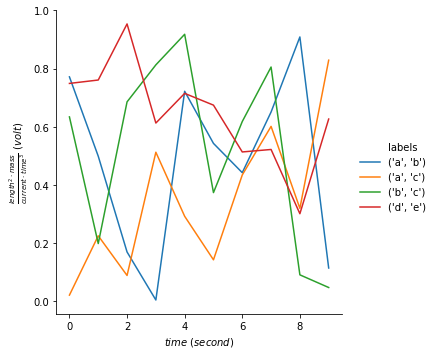

In [6]:
signal.relplot()

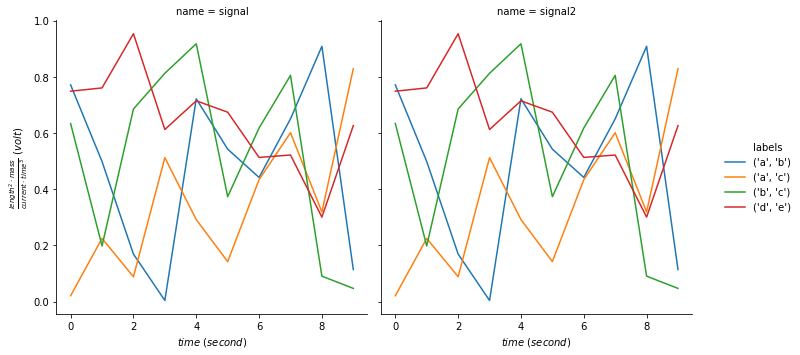

In [7]:
container = SignalContainer([signal, signal2])
container.relplot(col='name')

In [8]:
container.to_longframe().head()

,c,domain,domain_max,domain_min,domain_units,domain_units_dimensionality,f,labels,name,signal_max,signal_min,t,units,units_dimensionality,values,values_label
0,b,1.000000e-10,NaN,NaN,second,[time],b,"(a, b)",signal,NaN,NaN,c,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,0.771321,a
1,c,1.000000e-10,NaN,NaN,second,[time],b,"(a, c)",signal,NaN,NaN,c,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,0.020752,a
2,c,1.000000e-10,NaN,NaN,second,[time],b,"(b, c)",signal,NaN,NaN,c,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,0.633648,b
3,e,1.000000e-10,NaN,NaN,second,[time],b,"(d, e)",signal,NaN,NaN,c,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,0.748804,d
4,b,1.000000e+00,NaN,NaN,second,[time],b,"(a, b)",signal,NaN,NaN,c,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,0.498507,a


In [9]:
print(container['signal'])
print(container['signal'] == container[0])

Signal(
	 name=signal, 
	 labels=MultiIndex([('a', 'b'),
            ('a', 'c'),
            ('b', 'c'),
            ('d', 'e')],
           names=['values', 'c']), 
	 units=volt, 
	 shape=(10, 4), 
	 domain=Domain(start=0.0, end=9.0, interval=1.0, units=second), 
	 domain_axis=0 
 )
True


In [10]:
mean_container = container.mean(axis=1)

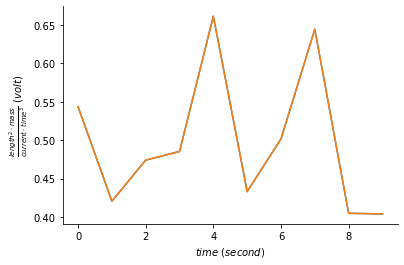

In [11]:
mean_container.plot()

In [14]:
# est = signal.pca(n_boots=100)
# est.components_

In [15]:
# est

In [17]:
# est = container.pca(n_boots=100, seed=10, n_jobs=2)
# est.components_

In [18]:
# attributes of signal

print(signal.attrs)
print(signal.dtype)
print(signal.units)
print(signal.domain)
print(signal.values)
print(signal.magnitude)
print(signal.boundaries)
print(signal.interpolator)
print(signal.interpolator_kwargs)
print(signal.labels)
print(signal.domain_axis)
print(signal.other_axis)
print(signal.other_len)
print(signal.domain_len)
print(signal.shape)
print(signal.size)
print(signal.ndim)
print(signal.integral)
print(signal.piecewise_integral)
print(signal.normalized_signal)
print(signal.piecewise_gradient)  # 
print(signal.gradient)  # numpy.gradient
print(signal.nanless)
print(signal.T)

{'f': 'b', 't': 'c'}
<class 'numpy.float64'>
volt
Domain(start=0.0, end=9.0, interval=1.0, units=second)
[[0.77132064 0.02075195 0.63364823 0.74880388] [0.49850701 0.22479665 0.19806286 0.76053071] [0.16911084 0.08833981 0.68535982 0.95339335] [0.00394827 0.51219226 0.81262096 0.61252607] [0.72175532 0.29187607 0.91777412 0.71457578] [0.54254437 0.14217005 0.37334076 0.67413362] [0.44183317 0.43401399 0.61776698 0.51313824] [0.65039718 0.60103895 0.8052232  0.52164715] [0.90864888 0.31923609 0.09045935 0.30070006] [0.11398436 0.82868133 0.04689632 0.62628715]] volt
[[0.77132064 0.02075195 0.63364823 0.74880388]
 [0.49850701 0.22479665 0.19806286 0.76053071]
 [0.16911084 0.08833981 0.68535982 0.95339335]
 [0.00394827 0.51219226 0.81262096 0.61252607]
 [0.72175532 0.29187607 0.91777412 0.71457578]
 [0.54254437 0.14217005 0.37334076 0.67413362]
 [0.44183317 0.43401399 0.61776698 0.51313824]
 [0.65039718 0.60103895 0.8052232  0.52164715]
 [0.90864888 0.31923609 0.09045935 0.30070006]
 [0.1

There are a variety of methods implemented in this class with which you can perform operations on your signal.

In [19]:
# methods of signal

print(signal(3.2)) # interpolation of single value
print(signal([3.2, 4.5])) # interpolation to multiple values
print(signal.to('mV')) # converting units
print(signal.enforce_uniformity()) # on domain
print(signal.window_filter(4, polyorder=3)) # savgol filter default polyorder 2 ## scipy.signal.savgol_filter
print(signal.cov())
print(signal.corr())
print(signal.cov(pandas=True))
print(signal.mean(axis=signal.other_axis), signal.sum())
print(signal.moveaxis(0, 1))

[0.14750968 0.46812902 0.83365159 0.63293601] volt
Signal(
	 name=signal, 
	 labels=MultiIndex([('a', 'b'),
            ('a', 'c'),
            ('b', 'c'),
            ('d', 'e')],
           names=['values', 'c']), 
	 units=volt, 
	 shape=(2, 4), 
	 domain=Domain(start=3.2, end=4.5, interval=1.2999999999999998, units=second), 
	 domain_axis=0 
 )
Signal(
	 name=signal, 
	 labels=MultiIndex([('a', 'b'),
            ('a', 'c'),
            ('b', 'c'),
            ('d', 'e')],
           names=['values', 'c']), 
	 units=millivolt, 
	 shape=(10, 4), 
	 domain=Domain(start=0.0, end=9.0, interval=1.0, units=second), 
	 domain_axis=0 
 )
Signal(
	 name=signal, 
	 labels=MultiIndex([('a', 'b'),
            ('a', 'c'),
            ('b', 'c'),
            ('d', 'e')],
           names=['values', 'c']), 
	 units=volt, 
	 shape=(10, 4), 
	 domain=Domain(start=0.0, end=9.0, interval=1.0, units=second), 
	 domain_axis=0 
 )
Signal(
	 name=signal, 
	 labels=MultiIndex([('a', 'b'),
            ('a', 

In [20]:
other_signal1 = Signal(
    np.random.random((8, 4)), # 1 or 2D
    domain=np.arange(1, 9), 
    domain_axis=0, 
    units='volts', 
    domain_units='s', 
    attrs={'a':'b'},
    labels=['e', 'f', 'g', 'h'], # list-like
    interpolator_kwargs={'bounds_error':False, 'fill_value':0.5}
)

other_signal2 = Signal(
    np.random.random((10, 4)), # 1 or 2D
    domain=np.arange(10, 20), 
    domain_axis=0, 
    units='volts', 
    domain_units='s', 
    attrs={'a':'b'},
    labels=['e', 'f', 'g', 'h'], # list-like
    interpolator_kwargs={'bounds_error':False, 'fill_value':0.5}
)

There are also a variety of methods that can be applied when performing operations on two signals. 

In [21]:
# method with other signal

print(signal.equalize_domains(other_signal1))
print(signal.other_concat(other_signal1))
print(signal.concat(other_signal1))
print(signal.domain_concat(other_signal2))
print(signal.append(other_signal2))
print(signal == other_signal1) #checks if domains, units, and values are the same 
print(signal.dot(other_signal1))
print(signal.dot(other_signal1, pandas=True))

([[0.49850701 0.22479665 0.19806286 0.76053071] [0.16911084 0.08833981 0.68535982 0.95339335] [0.00394827 0.51219226 0.81262096 0.61252607] [0.72175532 0.29187607 0.91777412 0.71457578] [0.54254437 0.14217005 0.37334076 0.67413362] [0.44183317 0.43401399 0.61776698 0.51313824] [0.65039718 0.60103895 0.8052232  0.52164715] [0.90864888 0.31923609 0.09045935 0.30070006]] volt, [[0.54758616 0.819287   0.19894754 0.8568503 ] [0.35165264 0.75464769 0.29596171 0.88393648] [0.32551164 0.1650159  0.39252924 0.09346037] [0.82110566 0.15115202 0.38411445 0.94426071] [0.98762547 0.45630455 0.82612284 0.25137413] [0.59737165 0.90283176 0.53455795 0.59020136] [0.03928177 0.35718176 0.07961309 0.30545992] [0.33071931 0.7738303  0.03995921 0.42949218]] volt)
Signal(
	 name=signal, 
	 labels=Index([('a', 'b'), ('a', 'c'), ('b', 'c'), ('d', 'e'), 'e', 'f', 'g', 'h'], dtype='object'), 
	 units=volt, 
	 shape=(8, 8), 
	 domain=Domain(start=1.0, end=8.0, interval=1.0, units=second), 
	 domain_axis=0 
 )
Si

In [22]:
signal1 = Signal(np.arange(4), domain=np.arange(4), units='volts', domain_units='s')
signal2 = Signal(np.arange(4), domain=np.arange(4), units='V', domain_units='s')
print(signal1 == signal2)

True


Try saving, loading, and plotting your signal.

In [23]:
signal.save('data/test_signal.json')

In [24]:
Signal.load('data/test_signal.json') == signal

True

In [25]:
# plottings

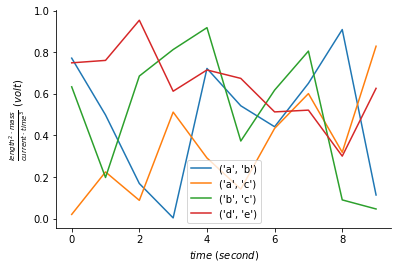

In [26]:
signal.plot(labels=True)

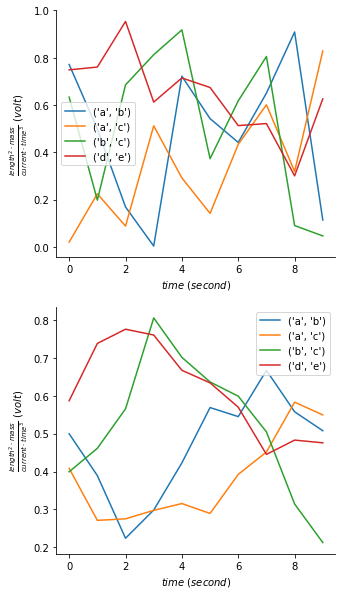

In [27]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(5, 10))

signal.plot(ax=axes[0], labels=True)
signal.window_filter(3, 'boxcar', extrapolate=True).plot(ax=axes[1], labels=True)
#signal filtered, smoother 

In [28]:
signal2 = Signal(signal, domain_min=2, domain_max=6, signal_min=0.5, signal_max=1)
#reinitialize and define as signal 2 and define min/max for mathematical operations. cuts off and sets to signal min and max.
#domain min and max for future operations and interpolation 

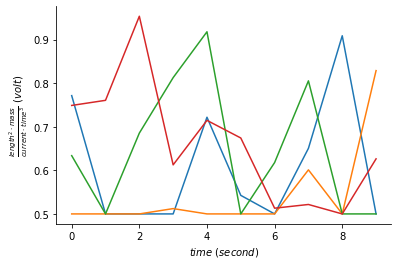

In [29]:
signal2.plot()

In [30]:
try:
    signal2(4)
except DreyeError as e:
    print(e)
    
print(signal2([2, 6]))

Interpolation domain above domain minimum.
Signal(
	 name=signal, 
	 labels=MultiIndex([('a', 'b'),
            ('a', 'c'),
            ('b', 'c'),
            ('d', 'e')],
           names=['values', 'c']), 
	 units=volt, 
	 shape=(2, 4), 
	 domain=Domain(start=2.0, end=6.0, interval=4.0, units=second), 
	 domain_axis=0 
 )


In [31]:
from dreye.core.spectrum import Spectrum

In [32]:
spectrum = Spectrum(
    np.arange(0, 100, 0.1), 
    np.linspace(300, 600, 1000)
)

In [33]:
spectrum2 = Spectrum(
    np.ones(100)*40, 
    np.linspace(300, 600, 100)
)

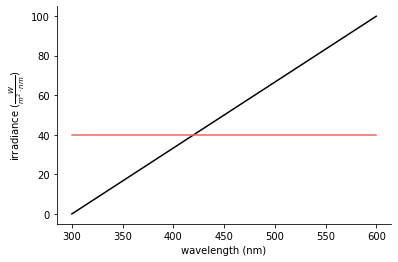

In [34]:
spectrum.plot()
spectrum2.plot(color='tomato')

In [35]:
print(type(spectrum + spectrum2))
print(type(spectrum.T))
print(type(spectrum._expand_dims(0).moveaxis(0, 1)))
print(spectrum._expand_dims(0).shape)

<class 'dreye.core.spectrum.AbstractSpectrum'>
<class 'dreye.core.spectrum.Spectrum'>
<class 'dreye.core.spectrum.Spectrum'>
(1, 1000)


In [36]:
type(spectrum.smooth())

/Users/matthias.christenson/Documents/dreye/dreye/core/signal.py:771: RuntimeWarning: chosen domain interval must be rounded down for filtering
  RuntimeWarning


dreye.core.spectrum.Spectrum

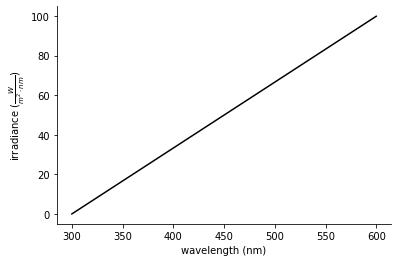

In [37]:
spectrum.smooth().plot()

In [38]:
print(type(spectrum.uE))
print(type(spectrum.irradiance))
print(type(spectrum.normalized_spectrum))

<class 'dreye.core.spectrum.Spectrum'>
<class 'dreye.core.spectrum.Spectrum'>
<class 'dreye.core.spectrum.AbstractSpectrum'>


In [39]:
print(type(spectrum.concat(spectrum2)))
print(type(spectrum.integral))

<class 'dreye.core.spectrum.Spectrum'>
<class 'pint.quantity.build_quantity_class.<locals>.Quantity'>


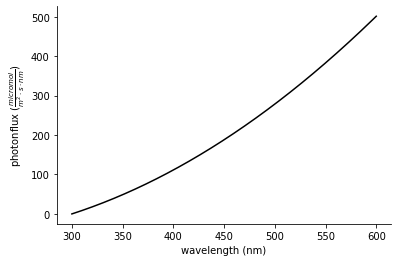

In [40]:
spectrum.uE.plot()

In [41]:
spectrum3 = Spectrum(
    np.ones(100)*40, 
    np.linspace(300, 600, 100), 
    units='uE'
)

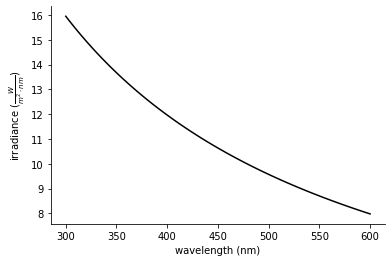

In [42]:
spectrum3.irradiance.plot()

In [43]:
spectrum = Spectrum(
    np.arange(0, 100, 0.1) + np.random.normal(0, 2, size=1000), 
    np.linspace(300, 600, 1000)
)

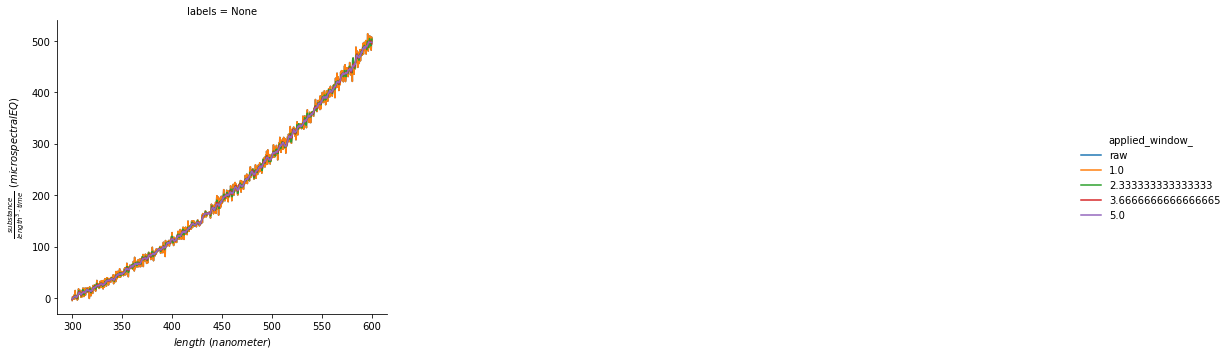

In [44]:
spectrum.uE.plotsmooth(max_window=5)

In [45]:
from dreye import create_gaussian_spectrum

In [46]:
gaussians = create_gaussian_spectrum(
    np.arange(300, 600, 0.5), 
    centers=[350, 450, 550]
) 

gaussians = gaussians + np.random.normal(0, 0.003, size=gaussians.shape)

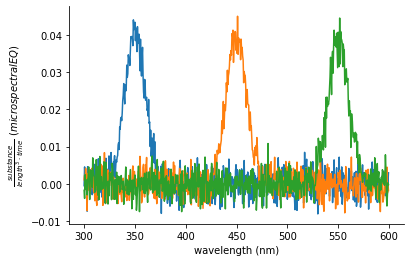

In [47]:
gaussians.plot()

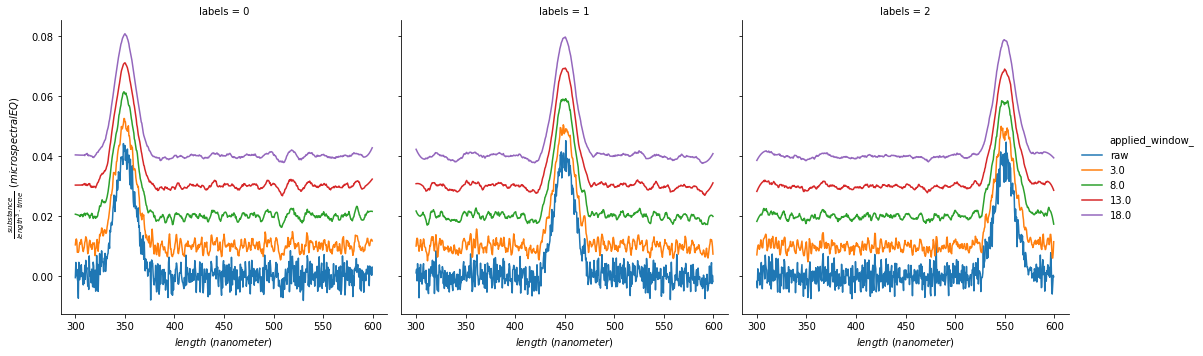

In [48]:
gaussians.plotsmooth(min_window=3, max_window=18, offset=0.01)